<a href="https://colab.research.google.com/github/mehranommani/Vehicles_Detection/blob/main/Vehicles_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a YOLOv3 Object Detector with Darknet


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!rm /mydrive

In [ ]:
!ln -s /content/drive/My\ Drive/ /mydrive
!ls /mydrive

'Colab Notebooks'  'My Drive'		  'Translated copy of Untitled document.gdoc'
 darknet	    Object_D		   Yolo4
 Images		   'Report Seminar.gdoc'   yolov9


In [ ]:
%cd /mydrive/darknet

/content/drive/My Drive/darknet


# Cloning and Building Darknet
The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [ ]:
# change makefile to have GPU and OPENCV enabled
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
# make darknet (build)
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘buff’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warn

#Download pretrained YOLOv3 weights
YOLOv3 has been trained already on the coco dataset which has 80 classes that it can predict.

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-05-08 07:51:15--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  14.8MB/s    in 17s     

2024-05-08 07:52:59 (13.7 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file
def download(path):
  from google.colab import files
  files.download(path)

# Step 4: Run Detections with Darknet and YOLOv3!


In [ ]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/drive/MyDrive/darknet/data/luggage.jpg

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 800, cudnn_half = 0, GPU: NVIDIA A100-SXM4-40GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcu

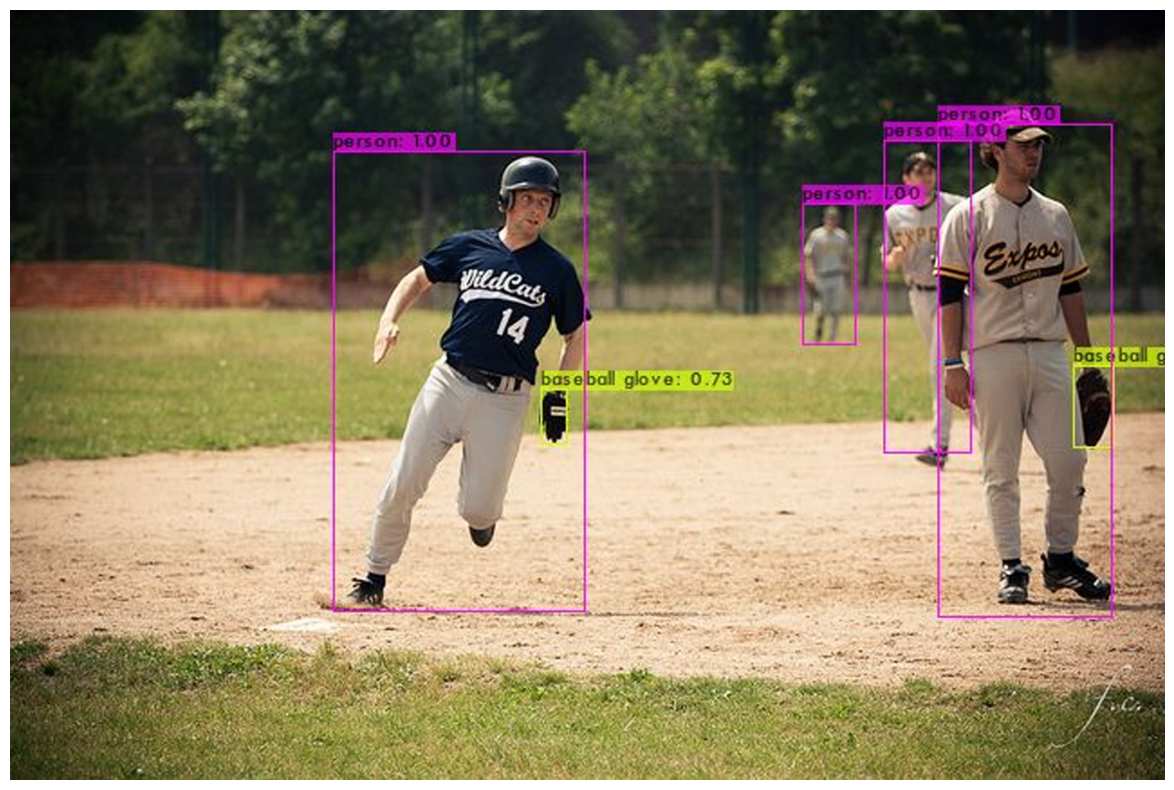

In [ ]:
# show image using our helper function
imShow('predictions.jpg')

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

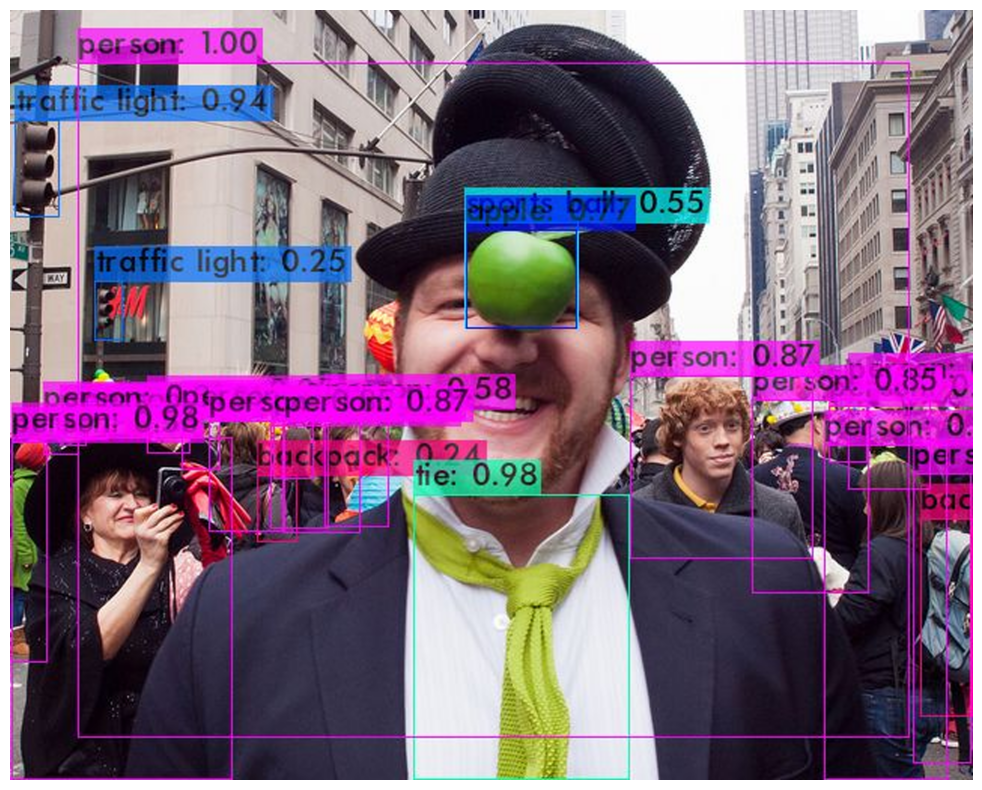

In [ ]:
# look we can run another detection!
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/drive/MyDrive/darknet/data/people.jpg
imShow('predictions.jpg')

In [ ]:
# LOCAL MACHINE DOWNLOAD
# if you get an error first run then run it again and it should work
download('predictions.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

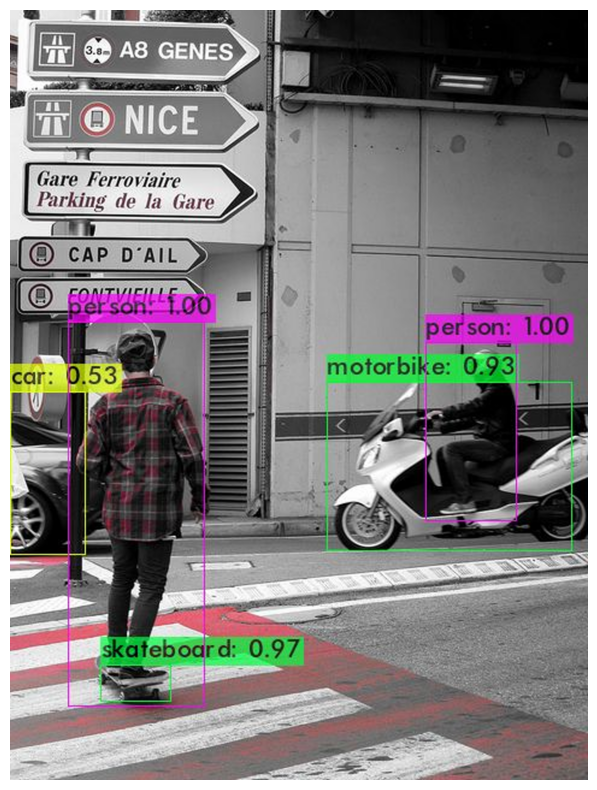

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/drive/MyDrive/darknet/data/skate.jpg
imShow('predictions.jpg')

# Training a Custom YOLOv3 Object Detector

#Using Google's Open Images Dataset

In [ ]:
!git clone https://github.com/theAIGuysCode/OIDv4_ToolKit.git

fatal: destination path 'OIDv4_ToolKit' already exists and is not an empty directory.


In [ ]:
# %cd darknet
!ls

darknet  Object_Detection.ipynb  street.jpg


In [ ]:
%cd OIDv4_ToolKit

/content/drive/MyDrive/project/darknet/OIDv4_ToolKit


In [ ]:
!pip install awscli --force-reinstall --upgrade

In [ ]:
!python main.py downloader --class Car Van Truck Bus Taxi Bicycle Motorcycle Helmet Traffic_sign Traffic_light --type_csv train --limit 300 --multiclasses 1


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Car', 'Van', 'Truck', 'Bus', 'Taxi', 'Bicycle', 'Motorcycle', 'Helmet', 'Traffic sign', 'Traffic light'] together.

Car
    [INFO] | Downloading train images.
    [INFO] | [INFO] Found 89465 onl

Convert image annotations

In [ ]:
!python convert_annotations.py

Currently in subdirectory: train
Converting annotations for class:  Car_Van_Truck_Bus_Taxi_Bicycle_Motorcycle_Helmet_Traffic sign_Traffic light
100% 2838/2838 [16:20<00:00,  2.89it/s]


#Configuring Files for Training
This step involves properly configuring the custom .cfg file, obj.data, obj.names and train.txt file.


## i) Cfg File
Copy over the yolov3.cfg to edit by running the cell below.

In [ ]:
%cd darknet
!ls

/content/drive/My Drive/project/darknet
3rdparty	darknet			Dockerfile.gpu	       net_cam_v3.sh	scripts
backup		DarknetConfig.cmake.in	generate_train.py      net_cam_v4.sh	src
bad.list	darknet_images.py	image_yolov3.sh        obj		vcpkg.json
build		darknet.py		image_yolov4.sh        OIDv4_ToolKit	vcpkg.json.opencv23
build.ps1	darknet_video.py	include		       package.xml	video_yolov3.sh
cfg		data			json_mjpeg_streams.sh  predictions.jpg	video_yolov4.sh
cmake		docker-compose.yml	LICENSE		       README.md	yolov3.weights
CMakeLists.txt	Dockerfile.cpu		Makefile	       results


In [ ]:
# download cfg to google drive and change its name
!cp cfg/yolov3.cfg /content/drive/MyDrive/project/darknet/cfg/yolov3-custom.cfg

In [ ]:
# to download to local machine (change its name to yolov3_custom.cfg once you download)
download('cfg/yolov3.cfg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now you need to edit the .cfg to fit your needs based on your object detector. Open it up in a code or text editor to do so.

If you downloaded cfg to google drive you can use the built in  **Text Editor** by going to your google drive and double clicking on yolov3_custom.cfg and then clicking on the **Open with** drop down and selectin **Text Editor**.
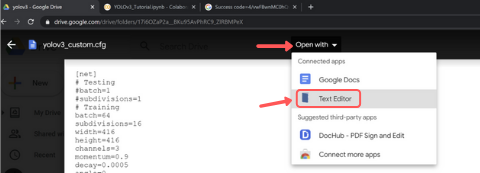

I recommend having **batch = 64** and **subdivisions = 16** for ultimate results. If you run into any issues then up subdivisions to 32.

Make the rest of the changes to the cfg based on how many classes you are training your detector on.

**Note:** I set my **max_batches = 10000**, **steps = 8000, 9000**, I changed the **classes = 5** in the three YOLO layers and **filters = 30** in the three convolutional layers before the YOLO layers.

**Optional:** In each of the three yolo layers in the cfg, change one line from random = 1 to **random = 0** to speed up training but slightly reduce accuracy of model. Will also help save memory if you run into any memory issues.


In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /content/drive/MyDrive/project/darknet/cfg/yolov3-custom.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd ..

cp: '/content/drive/MyDrive/project/darknet/cfg/yolov3-custom.cfg' and './cfg/yolov3-custom.cfg' are the same file


## ii) obj.names and obj.data
Create a new file within a code or text editor called **obj.names** and you will make this file exactly the same as your classes.txt in the dataset generation step.

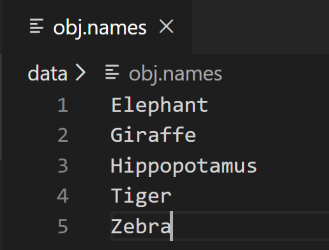

You will also create a **obj.data** file and fill it in like this (change your number of classes accordingly, as well as your backup location)

This backup path is where we will save the weights to of our model throughout training. Create a backup folder in your google drive and put its correct path in this file.

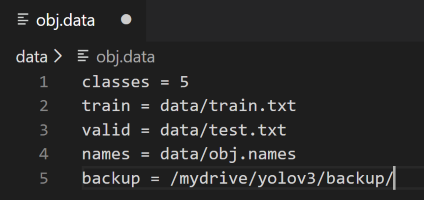



In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /content/drive/MyDrive/project/darknet/data/obj.names ./data
!cp /content/drive/MyDrive/project/darknet/data/obj.data  ./data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd ..

cp: '/content/drive/MyDrive/project/darknet/data/obj.names' and './data/obj.names' are the same file
cp: '/content/drive/MyDrive/project/darknet/data/obj.data' and './data/obj.data' are the same file


## iii) Generating train.txt
The last configuration file needed before we can begin to train our custom detector is the train.txt file which hold the relative paths to all our training images.

Luckily I have created a script that I showed in a past video that generates train.txt for us.

The script can be accessed from this [Github Repo](https://github.com/theAIGuysCode/YoloGenerateTrainingFile/blob/master/generate_train.py/)

Just download the file to your local machine or Google drive so we can upload it to your cloud VM.

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /content/drive/MyDrive/project/darknet/generate_train.py ./

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()


cp: '/content/drive/MyDrive/project/darknet/generate_train.py' and './generate_train.py' are the same file


Now we simply run the python script to do all the work for us.

In [ ]:
!ls
# %cd darknet

3rdparty		 darknet53.conv.74	 image_yolov4.sh	README.md
backup			 DarknetConfig.cmake.in  include		results
bad.list		 darknet_images.py	 json_mjpeg_streams.sh	scripts
build			 darknet.py		 LICENSE		src
build.ps1		 darknet_video.py	 Makefile		vcpkg.json
cfg			 data			 net_cam_v3.sh		vcpkg.json.opencv23
chart.png		 docker-compose.yml	 net_cam_v4.sh		video_yolov3.sh
chart_yolov3-custom.png  Dockerfile.cpu		 obj			video_yolov4.sh
cmake			 Dockerfile.gpu		 OIDv4_ToolKit		yolov3.weights
CMakeLists.txt		 generate_train.py	 package.xml
darknet			 image_yolov3.sh	 predictions.jpg


In [ ]:
!python generate_train.py

In [ ]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree        dog.jpg	    imagenet.labels.list      obj		pedestrians.jpg  train.txt
apartment.jpg  eagle.jpg    imagenet.shortnames.list  obj.data		people.jpg	 voc.names
car.jpg        giraffe.jpg  labels		      objects.jpg	scream.jpg
coco9k.map     goal.txt     lego.jpg		      obj.names		skate.jpg
coco.names     horses.jpg   luggage.jpg		      openimages.names	street.jpg


If everything went as planned double click on **train.txt** on the left side File Explorer and it should look like this.
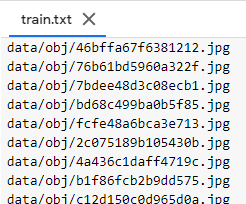

It will contain one line for each training image path.

# Step 4: Download pre-trained weights for the convolutional layers.
This step downloads the weights for the convolutional layers of the YOLOv3 network. By using these weights it helps your custom object detector to be way more accurate and not have to train as long. You don't have to use these weights but trust me it will help your modle converge and be accurate way faster. USE IT!

In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2024-05-06 13:02:45--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2024-05-06 13:02:46--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  33.0MB/s    in 5.4s    

2024-05-06 13:02:55 (28.8 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# Step 5: Train Your Custom Object Detector!
The time has finally come! You have made it to the moment of truth! You are now ready to train your custom YOLOv3 object detector on whatever crazy classes you have decided on. So run the following command. (dont_show flag stops a chart from popping up since cloud can't open images on the spot)
```
!./darknet detector train <path to obj.data> <path to custom config> darknet53.conv.74 -dont_show
```
**TIP:** This training could take several hours depending on how many iterations you chose in the .cfg file. You will want to let this run as you sleep or go to work for the day, etc. However, Colab Cloud Service kicks you off it's VMs if you are idle for too long (30-90 mins).

To avoid this hold (CTRL + SHIFT + i) at the same time to open up the inspector view on your browser.

Paste the following code into your console window and hit **Enter**
```
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}
setInterval(ClickConnect,60000)
```
Looks like this, it will click the screen every 10 minutes so that you don't get kicked off for being idle! HACKS!

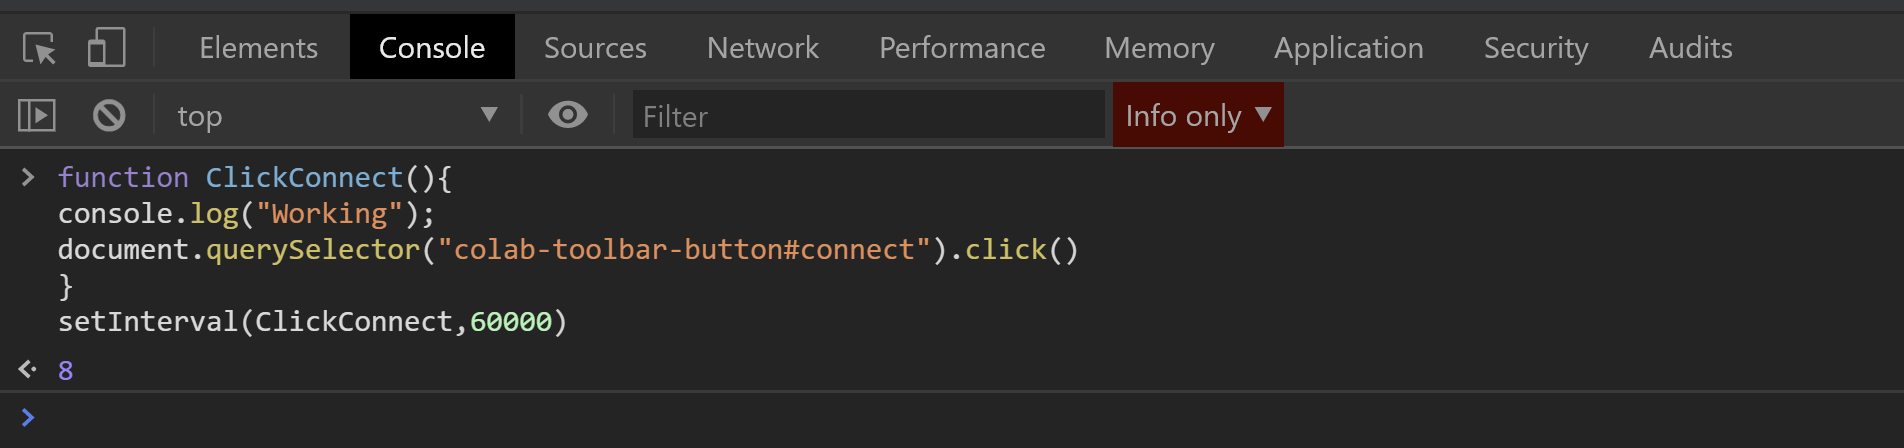

In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3-custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.417974), count: 3, class_loss = 1.337341, iou_loss = 1.536999, total_loss = 2.874339 
 total_bbox = 169744, rewritten_bbox = 1.298426 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.679727), count: 8, class_loss = 1.958049, iou_loss = 0.794483, total_loss = 2.752532 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.751000), count: 1, class_loss = 0.258919, iou_loss = 0.068720, total_loss = 0.327639 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.580504), count: 9, class_loss = 3.697992, iou_loss = 1.318165, total_loss = 5.016156 
 total_bbox = 169762, rewritten_bbox = 1.298288 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.658850), count: 4, class_loss = 1.382833, iou_loss = 0.441384, total_loss = 1.824217 
v3 (m

You can observe a chart of how your model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. For your model to be 'accurate' you would aim for a loss under 2.

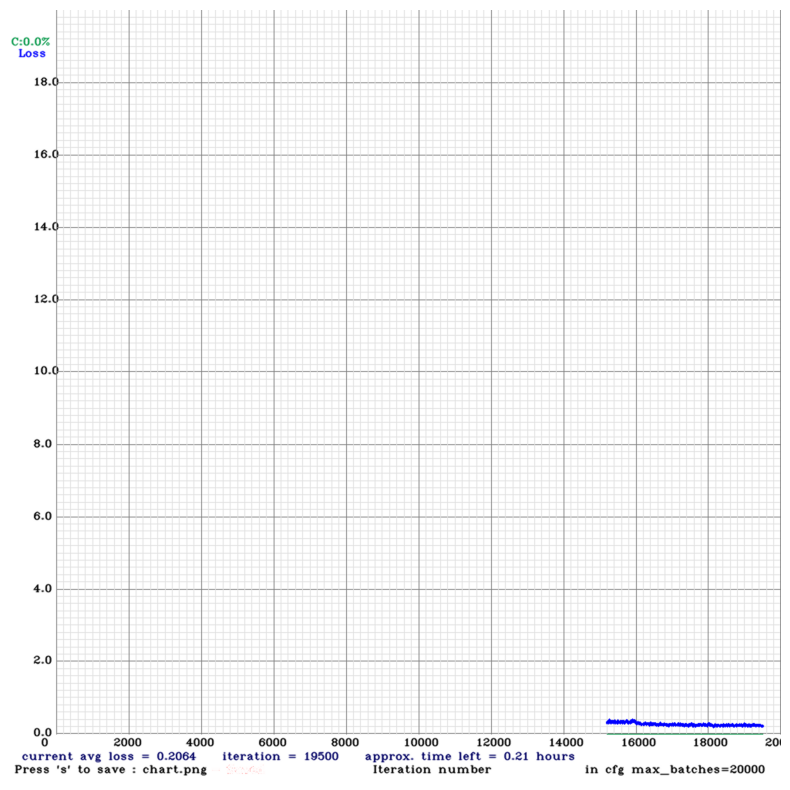

In [ ]:
imShow('chart.png')

**TRICK**: If for some reason you get an error or your Colab goes idle during training, you have not lost your weights! Every 100 iterations a weights file called **yolov3_custom_last.weights** is saved to **mydrive/yolov3/backup/** folder (wherever your backup folder is). This is why we created this folder in our Google drive and not on the cloud VM. If your runtime crashes and your backup folder was in your cloud VM you would lose your weights and your training progress.

We can kick off training from our last saved weights file so that we don't have to restart! WOOHOO! Just run the following command but with your backup location.
```
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show
```

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3-custom.cfg /content/drive/MyDrive/darknet/backup/yolov3-custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.825941), count: 4, class_loss = 0.055888, iou_loss = 0.122219, total_loss = 0.178107 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.693694), count: 1, class_loss = 0.236017, iou_loss = 0.096052, total_loss = 0.332068 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.003289, iou_loss = 0.000000, total_loss = 0.003289 
 total_bbox = 47342, rewritten_bbox = 1.315956 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.889728), count: 2, class_loss = 0.024356, iou_loss = 0.022837, total_loss = 0.047192 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.890099), count: 4, class_loss = 0.000195, iou_loss = 0.027489, total_loss = 0.027683 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00

# Step 6: Run Your Custom Object Detector!!!
You have done it! You now have a custom object detector to make your very own detections. Time to test it out and have some fun!

In [ ]:
# need to set our custom cfg to test mode
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3-custom.cfg
%cd ..


 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 800, cudnn_half = 0, GPU: NVIDIA A100-SXM4-40GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcu

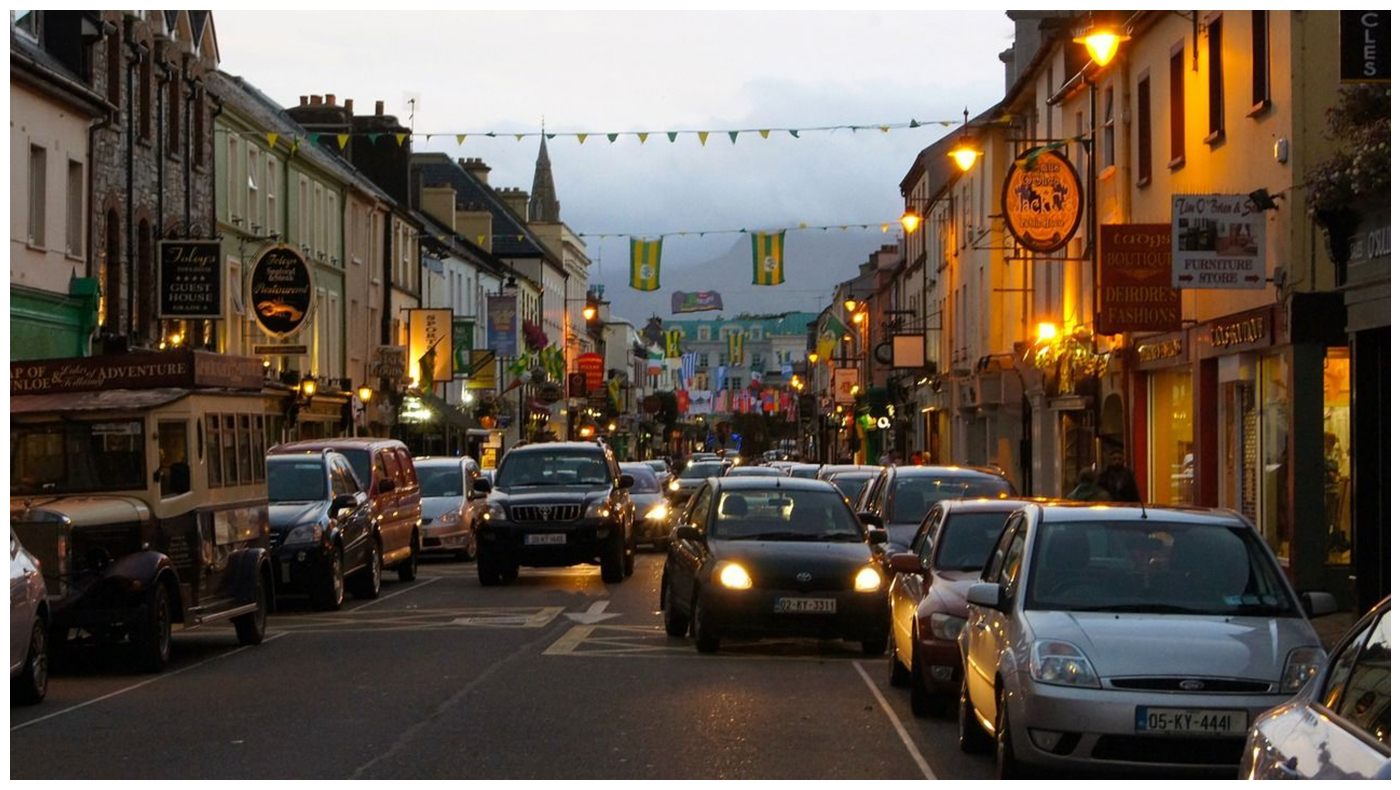

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights /mydrive/images/safari.jpg -thresh 0.3
imShow('predictions.jpg')

# Thanks!
Thanks for following along this tutorial, I hope it worked well for all of you!

If you enjoy YOLOv3 check out my other videos and subscribe to my channel so you don't miss out on any other amazing YOLOv3 content!

[The AI Guy](https://www.youtube.com/channel/UCrydcKaojc44XnuXrfhlV8Q)